# Ultimate Data Challenge

### Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime


df_logins = pd.read_json("logins.json")
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [2]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [3]:
df_logins.isnull().values.any()

False

In [4]:
df_logins.duplicated().value_counts()

False    92265
True       877
dtype: int64

In [5]:
# investage more the duplicated items

df_logins[df_logins.duplicated()]

,login_time
354,1970-01-02 10:59:52
434,1970-01-02 12:27:48
506,1970-01-02 15:08:27
524,1970-01-02 16:14:36
675,1970-01-02 22:03:36
...,...
92051,1970-04-12 05:24:21
92367,1970-04-12 15:46:43
92439,1970-04-12 17:12:21
92986,1970-04-13 12:23:46


looks like the duplicates have have the same month date and year, need to break apart the timestame for more detail, doesn't like exact duplicates

In [6]:
df_logins['login_time'].value_counts()

1970-03-17 01:01:39    3
1970-01-06 21:45:52    3
1970-03-29 03:24:57    3
1970-04-12 04:03:15    3
1970-04-04 01:17:40    3
                      ..
1970-02-13 21:05:25    1
1970-02-13 21:10:52    1
1970-02-13 21:20:04    1
1970-02-13 21:12:19    1
1970-04-13 18:54:23    1
Name: login_time, Length: 92265, dtype: int64

In [7]:
df_logins['login_time'] = pd.to_datetime(df_logins.login_time, format='%Y-%b-%d %H:%M:%S')

In [8]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [9]:
df_logins['Count'] = 1

In [10]:
df_logins.head()

,login_time,Count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [11]:
df_agg = pd.DataFrame(df_logins.groupby([pd.Grouper(key='login_time', freq='15Min')]).sum()).reset_index()

In [12]:
df_agg

,login_time,Count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
...,...,...
9783,1970-04-13 17:45:00,5
9784,1970-04-13 18:00:00,5
9785,1970-04-13 18:15:00,2
9786,1970-04-13 18:30:00,7


In [13]:
df_agg = df_agg.set_index('login_time')

In [14]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [15]:
df_agg['month'] = df_agg.index.month

In [16]:
df_agg.head()

,Count,month
login_time,,
1970-01-01 20:00:00,2,1
1970-01-01 20:15:00,6,1
1970-01-01 20:30:00,9,1
1970-01-01 20:45:00,7,1
1970-01-01 21:00:00,1,1


In [17]:
plt.style.use('ggplot')

In [18]:
plt.rcParams["figure.figsize"] = (10,3)

In [19]:
y = df_agg['Count']

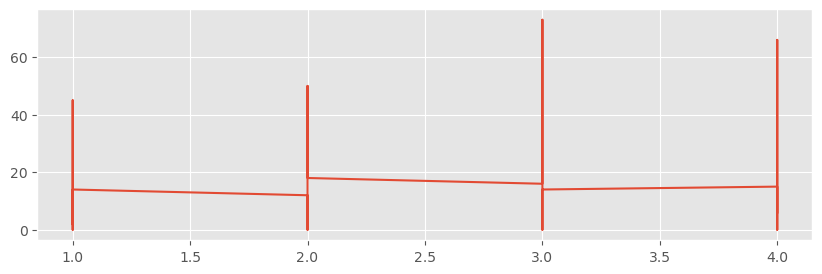

In [20]:
plt.plot('month','Count', data = df_agg)

looks like 2 months there seems to be a trend the increase in login times from January to March and drops off a bit after April. 

<AxesSubplot: >

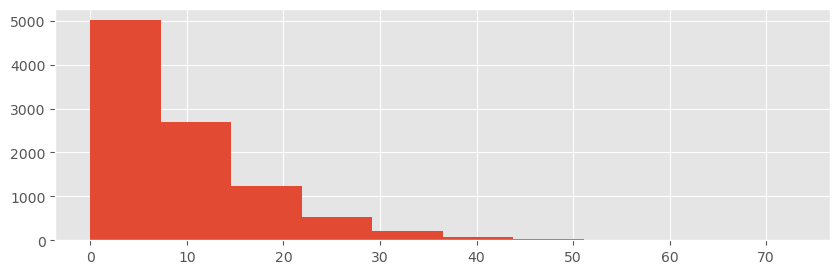

In [21]:
y.hist()

## Part 2

The key measure of success for this experiment would be the increase in the number of driver partners who operate in both cities after the toll reimbursement program is implemented. This metric can be measured by comparing the number of driver partners who cross the toll bridge before and after the program starts.

By tracking the number of driver partners who operate in both cities, the experiment's success can be evaluated. If the toll reimbursement program is successful, there should be an increase in the number of driver partners who cross the toll bridge to serve both cities. This will lead to a decrease in wait times for customers and an increase in the efficiency of the ride-sharing service in both cities.

Furthermore, this metric is easy to measure, track, and report, making it a suitable choice for evaluating the success of the experiment. Other metrics such as the revenue generated by driver partners or customer satisfaction can also be considered, but they are indirectly related to the experiment's goal and may not be as accurate in measuring the success of the program.

To design a practical experiment to compare the effectiveness of the proposed change:

a) **Experiment Implementation:**

    Select a sample of driver partners who currently operate exclusively in one city and are not reimbursed for toll costs.
    Randomly assign half of the sample to a treatment group that will be reimbursed for toll costs when driving to the other city, and the other half to a control group that will not be reimbursed for toll costs.
    Implement the toll reimbursement program for the treatment group and monitor the number of driver partners who cross the toll bridge to serve both cities.
    Collect data on the number of toll reimbursements processed, the number of driver partners who operate in both cities, and the number of rides completed in each city.

b) **Statistical Test:**

    To verify the significance of the observation, we can conduct a t-test. The t-test will be used to compare the mean number of driver partners who cross the toll bridge in the treatment group and the control group. The null hypothesis is that they are the same and the alternate hypothesis is that they are equal.

c) **Results Interpretation and Recommendations:**

    If the results show a statistically significant difference between the treatment and control groups, we can conclude that the toll reimbursement program was effective in encouraging driver partners to serve both cities. We can recommend that the city operations team implement the program for all driver partners and monitor the impact on wait times and efficiency.

    However, there are some downsides. The toll reimbursement program may not be effective for all driver partners, and some may still choose to operate exclusively in one city due to personal preferences or other factors. Additionally, the program may have unintended consequences, such as increased traffic on the toll bridge or increased costs for the ride-sharing service. Therefore, it is important to monitor the program's impact and make adjustments as necessary.

    The length of time that the experiment needs to be performaned is several weeks to have enough data points especailly on the weekends since both cities are acitive and drivers have incentive to use the toll bridge, but weekdays should also be sampled.

## Part 3

In [22]:
df_r = pd.read_json("ultimate_data_challenge.json")

In [23]:
df_r.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [24]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


data is in tidy format, every row is on observation, and every column is a varible, for data cleaning I first look if it's in the right structure , then if it's messy such as missing values, and duplicates. Looking at the info above it appears that some columns have some missing values.

In [25]:
print(f"Shape of mass shooting data: {df_r.shape}")
print(f"Number of mission values in mass shooting data: \
{df_r.isnull().sum()}")
print(f"Number of duplicate values in mass shooting data: \
{df_r.duplicated().sum()}")

Shape of mass shooting data: (50000, 12)
Number of mission values in mass shooting data: city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64
Number of duplicate values in mass shooting data: 8


In [26]:
df_r[df_r['avg_rating_of_driver'].isnull()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49984,Winterfell,1,2014-01-26,NaN,1.0,2014-01-26,Android,0.0,False,0.0,3.50,5.0
49985,Astapor,1,2014-01-26,NaN,1.0,2014-02-25,Android,0.0,False,100.0,1.38,5.0
49989,Winterfell,1,2014-01-24,NaN,1.0,2014-01-31,iPhone,0.0,False,100.0,0.00,5.0
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0


looks like the average rating of the drivers has the most missing values of 8122, the decision becomes whether to drop the column, drop the rows or to backfill the rows with the average. The rows do have vital data beyond the rating, so backfilling seems like an option.  

In [27]:
df_r['avg_rating_of_driver'].fillna(df_r['avg_rating_of_driver'].median(numeric_only=True), inplace=True)

In [28]:
df_r['avg_rating_of_driver'].isnull().sum()

0

so the null valuues are gone for the column with the most null values, the rest of the colums null values will be dropped

In [29]:
df_r.dropna(inplace=True)

In [30]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49406 non-null  object 
 1   trips_in_first_30_days  49406 non-null  int64  
 2   signup_date             49406 non-null  object 
 3   avg_rating_of_driver    49406 non-null  float64
 4   avg_surge               49406 non-null  float64
 5   last_trip_date          49406 non-null  object 
 6   phone                   49406 non-null  object 
 7   surge_pct               49406 non-null  float64
 8   ultimate_black_user     49406 non-null  bool   
 9   weekday_pct             49406 non-null  float64
 10  avg_dist                49406 non-null  float64
 11  avg_rating_by_driver    49406 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


Now to change the signup_date and last_trip_date from strings to datetime objects

In [31]:
df_r['signup_date']= pd.to_datetime(df_r['signup_date'])
df_r['last_trip_date']= pd.to_datetime(df_r['last_trip_date'])

In [32]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49406 non-null  object        
 1   trips_in_first_30_days  49406 non-null  int64         
 2   signup_date             49406 non-null  datetime64[ns]
 3   avg_rating_of_driver    49406 non-null  float64       
 4   avg_surge               49406 non-null  float64       
 5   last_trip_date          49406 non-null  datetime64[ns]
 6   phone                   49406 non-null  object        
 7   surge_pct               49406 non-null  float64       
 8   ultimate_black_user     49406 non-null  bool          
 9   weekday_pct             49406 non-null  float64       
 10  avg_dist                49406 non-null  float64       
 11  avg_rating_by_driver    49406 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

since we are interested modeling whether or not a user is active for six months, we need to create another column
their last trip date minue their singup date

In [33]:
df_r['duration'] = df_r['last_trip_date'] - df_r['signup_date']

In [34]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   city                    49406 non-null  object         
 1   trips_in_first_30_days  49406 non-null  int64          
 2   signup_date             49406 non-null  datetime64[ns] 
 3   avg_rating_of_driver    49406 non-null  float64        
 4   avg_surge               49406 non-null  float64        
 5   last_trip_date          49406 non-null  datetime64[ns] 
 6   phone                   49406 non-null  object         
 7   surge_pct               49406 non-null  float64        
 8   ultimate_black_user     49406 non-null  bool           
 9   weekday_pct             49406 non-null  float64        
 10  avg_dist                49406 non-null  float64        
 11  avg_rating_by_driver    49406 non-null  float64        
 12  duration                49406 no

In [35]:
df_r[df_r['duration'] >= '180 days']

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,duration
1614,Winterfell,4,2014-01-01,4.9,1.02,2014-06-30,iPhone,5.3,False,72.0,1.65,4.8,180 days
1636,Winterfell,2,2014-01-01,5.0,1.09,2014-07-01,Android,7.1,False,71.4,3.14,4.7,181 days
1745,Winterfell,3,2014-01-01,4.8,1.00,2014-06-30,iPhone,0.0,True,100.0,4.77,5.0,180 days
2226,King's Landing,4,2014-01-01,5.0,1.12,2014-06-30,iPhone,20.5,False,51.3,1.89,4.8,180 days
2902,Winterfell,1,2014-01-01,5.0,1.10,2014-06-30,iPhone,17.9,True,82.1,2.64,4.7,180 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47127,Winterfell,5,2014-01-01,5.0,1.02,2014-07-01,iPhone,2.9,False,55.9,5.18,4.7,181 days
47154,Winterfell,0,2014-01-01,4.8,1.09,2014-06-30,iPhone,8.7,False,47.8,3.10,4.3,180 days
48183,Winterfell,9,2014-01-01,4.9,1.03,2014-06-30,iPhone,2.4,False,75.6,5.31,4.7,180 days
49034,Winterfell,2,2014-01-01,4.9,1.00,2014-06-30,iPhone,0.0,False,100.0,14.91,5.0,180 days


In [36]:
# create a function that sorts the duration by those customer that are >= 150 days(around 5months)
# sice it is more frequent than 6 months(180 days) according to the histogram.

def retention(x):
    if x >= 150:
        x = 1
    else:
        x = 0
    return x 


In [37]:
# create a copy of dataframe before doing more data wrangling for machine learning

df = df_r.copy()

### Recode duration into 6months or not 

In [38]:
df['duration'] = df['duration'].apply(lambda x: x.days)

In [39]:
df['duration'].head()

0    143
1     96
2      1
3    170
4     47
Name: duration, dtype: int64

<AxesSubplot: >

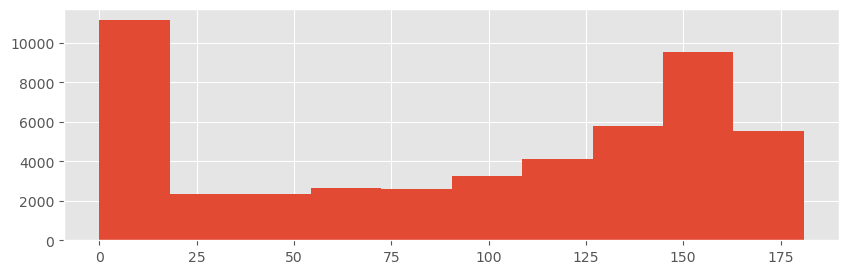

In [40]:
df['duration'].hist()

In [41]:
type(df['duration'][0])

numpy.int64

the timedelta data type was converted successfully

In [42]:
df['duration_coded'] = df['duration'].apply(lambda x: retention(x))

In [43]:
df.sample(20)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,duration,duration_coded
18797,Astapor,2,2014-01-15,4.4,1.38,2014-05-22,Android,33.3,False,66.7,3.69,5.0,127,0
46333,Winterfell,2,2014-01-21,5.0,1.13,2014-02-15,Android,50.0,False,50.0,4.42,5.0,25,0
11271,King's Landing,0,2014-01-24,4.9,1.00,2014-06-19,iPhone,0.0,False,100.0,9.97,5.0,146,0
47960,Astapor,3,2014-01-03,5.0,1.00,2014-03-20,Android,0.0,True,90.9,1.71,4.7,76,0
7699,Winterfell,2,2014-01-09,3.0,1.00,2014-05-21,iPhone,0.0,False,100.0,8.40,4.1,132,0
32404,Astapor,4,2014-01-19,4.9,1.00,2014-06-29,iPhone,0.0,True,54.5,5.13,4.8,161,1
3105,Winterfell,1,2014-01-19,4.0,2.50,2014-01-20,Android,100.0,False,0.0,1.88,5.0,1,0
34328,Winterfell,2,2014-01-05,4.3,1.00,2014-06-20,iPhone,0.0,False,50.0,2.32,5.0,166,1
32505,Winterfell,6,2014-01-25,4.5,1.00,2014-06-02,iPhone,0.0,True,62.5,2.30,4.5,128,0
17694,Astapor,0,2014-01-10,5.0,1.00,2014-04-20,iPhone,0.0,False,0.0,9.60,4.0,100,0


In [44]:
df['duration_coded'].value_counts()

0    36799
1    12607
Name: duration_coded, dtype: int64

looks like the dataset is very unbalanced this will be addressed latter in the modeling section, there are many options(such as sampling) 
and this will be explored in the following sections

## Drop singup_date and last_trip_date 

In [45]:
df.drop(['signup_date', 'last_trip_date'], axis = 1, inplace=True)

In [46]:
df.sample(5)

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,duration,duration_coded
15017,Astapor,3,5.0,1.08,iPhone,16.7,True,0.0,3.16,4.7,36,0
41022,King's Landing,0,4.7,1.00,iPhone,0.0,False,60.0,3.14,5.0,166,1
7528,King's Landing,1,5.0,1.00,iPhone,0.0,True,66.7,11.93,5.0,158,1
12648,Astapor,0,4.9,1.00,Android,0.0,False,100.0,4.86,5.0,92,0
48265,Winterfell,1,5.0,1.00,Android,0.0,False,33.3,1.71,4.3,56,0


In [47]:
df.drop('duration', axis = 1, inplace=True)

In [48]:
df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,duration_coded
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,0
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0


In [49]:
df['phone'].value_counts()

iPhone     34446
Android    14960
Name: phone, dtype: int64

In [50]:
jk= pd.get_dummies(df['phone'])

In [51]:
jk

,Android,iPhone
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
49995,0,1
49996,0,1
49997,1,0
49998,0,1


In [52]:
df = df.join(jk)

In [53]:
df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,duration_coded,Android,iPhone
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,0,0,1
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0,1,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0,0,1
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1,0,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0,1,0


now drop Iphone -- since it's reduntant -- and phone, since they are reduntant

In [54]:
df.drop(['phone', 'iPhone' ], axis=1, inplace=True)

In [55]:
df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,duration_coded,Android
0,King's Landing,4,4.7,1.10,15.4,True,46.2,3.67,5.0,0,0
1,Astapor,0,5.0,1.00,0.0,False,50.0,8.26,5.0,0,1
2,Astapor,3,4.3,1.00,0.0,False,100.0,0.77,5.0,0,0
3,King's Landing,9,4.6,1.14,20.0,True,80.0,2.36,4.9,1,0
4,Winterfell,14,4.4,1.19,11.8,False,82.4,3.13,4.9,0,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49406 non-null  object 
 1   trips_in_first_30_days  49406 non-null  int64  
 2   avg_rating_of_driver    49406 non-null  float64
 3   avg_surge               49406 non-null  float64
 4   surge_pct               49406 non-null  float64
 5   ultimate_black_user     49406 non-null  bool   
 6   weekday_pct             49406 non-null  float64
 7   avg_dist                49406 non-null  float64
 8   avg_rating_by_driver    49406 non-null  float64
 9   duration_coded          49406 non-null  int64  
 10  Android                 49406 non-null  uint8  
dtypes: bool(1), float64(6), int64(2), object(1), uint8(1)
memory usage: 4.9+ MB


convert Android column to int64

In [57]:
df['Android'] = df['Android'].astype('int64')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49406 non-null  object 
 1   trips_in_first_30_days  49406 non-null  int64  
 2   avg_rating_of_driver    49406 non-null  float64
 3   avg_surge               49406 non-null  float64
 4   surge_pct               49406 non-null  float64
 5   ultimate_black_user     49406 non-null  bool   
 6   weekday_pct             49406 non-null  float64
 7   avg_dist                49406 non-null  float64
 8   avg_rating_by_driver    49406 non-null  float64
 9   duration_coded          49406 non-null  int64  
 10  Android                 49406 non-null  int64  
dtypes: bool(1), float64(6), int64(3), object(1)
memory usage: 5.2+ MB


In [59]:
df['city'].value_counts()

Winterfell        23024
Astapor           16355
King's Landing    10027
Name: city, dtype: int64

In [60]:
city_dummies = pd.get_dummies(df['city'], drop_first=True)

In [61]:
city_dummies

,King's Landing,Winterfell
0,1,0
1,0,0
2,0,0
3,1,0
4,0,1
...,...,...
49995,1,0
49996,0,0
49997,0,1
49998,0,0


In [62]:
df = df.join(city_dummies)

In [63]:
df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,duration_coded,Android,King's Landing,Winterfell
0,King's Landing,4,4.7,1.10,15.4,True,46.2,3.67,5.0,0,0,1,0
1,Astapor,0,5.0,1.00,0.0,False,50.0,8.26,5.0,0,1,0,0
2,Astapor,3,4.3,1.00,0.0,False,100.0,0.77,5.0,0,0,0,0
3,King's Landing,9,4.6,1.14,20.0,True,80.0,2.36,4.9,1,0,1,0
4,Winterfell,14,4.4,1.19,11.8,False,82.4,3.13,4.9,0,1,0,1


In [64]:
df.drop('city',axis=1, inplace=True)

In [65]:
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,duration_coded,Android,King's Landing,Winterfell
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,0,0,1,0
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,0,1,0,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,0,0,0,0
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,1,0,1,0
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,0,1,0,1


Now the data_set is cleaned and in a format for modeling, next we need to deal withe the unbalanced data. Since the data category of 
concerned is really unbalanced compared to the other category we will use a combination of undersampling and oversampling.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  49406 non-null  int64  
 1   avg_rating_of_driver    49406 non-null  float64
 2   avg_surge               49406 non-null  float64
 3   surge_pct               49406 non-null  float64
 4   ultimate_black_user     49406 non-null  bool   
 5   weekday_pct             49406 non-null  float64
 6   avg_dist                49406 non-null  float64
 7   avg_rating_by_driver    49406 non-null  float64
 8   duration_coded          49406 non-null  int64  
 9   Android                 49406 non-null  int64  
 10  King's Landing          49406 non-null  uint8  
 11  Winterfell              49406 non-null  uint8  
dtypes: bool(1), float64(6), int64(3), uint8(2)
memory usage: 4.9 MB


In [67]:
df = df[['trips_in_first_30_days', 'avg_rating_of_driver','avg_surge','surge_pct','ultimate_black_user','weekday_pct','avg_dist'
         , 'avg_rating_by_driver', 'Android', "King's Landing", 'Winterfell', 'duration_coded']]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  49406 non-null  int64  
 1   avg_rating_of_driver    49406 non-null  float64
 2   avg_surge               49406 non-null  float64
 3   surge_pct               49406 non-null  float64
 4   ultimate_black_user     49406 non-null  bool   
 5   weekday_pct             49406 non-null  float64
 6   avg_dist                49406 non-null  float64
 7   avg_rating_by_driver    49406 non-null  float64
 8   Android                 49406 non-null  int64  
 9   King's Landing          49406 non-null  uint8  
 10  Winterfell              49406 non-null  uint8  
 11  duration_coded          49406 non-null  int64  
dtypes: bool(1), float64(6), int64(3), uint8(2)
memory usage: 4.9 MB


In [69]:
df_clean = df.copy()

In [70]:
df_clean.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'Android', 'King's Landing', 'Winterfell',
       'duration_coded'],
      dtype='object')

# Modeling 

In [71]:
X, y = df_clean.loc[:, 'trips_in_first_30_days': 'Winterfell'].values, df_clean.loc[:, 'duration_coded'].values



In [72]:
X

array([[4, 4.7, 1.1, ..., 0, 1, 0],
       [0, 5.0, 1.0, ..., 1, 0, 0],
       [3, 4.3, 1.0, ..., 0, 0, 0],
       ...,
       [0, 5.0, 1.0, ..., 1, 0, 1],
       [2, 3.0, 1.0, ..., 0, 0, 0],
       [0, 4.9, 1.0, ..., 1, 0, 0]], dtype=object)

In [73]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
type(X)

numpy.ndarray

In [75]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance

smote = SMOTE(sampling_strategy=0.5, random_state=42)
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size =0.3)

In [77]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 36799, 1: 12607})


In [78]:
print('resampled dataset shape %s' % Counter(y_resampled))

resampled dataset shape Counter({0: 18399, 1: 18399})


### KNN

used the MCC along with the MCC metric because it's a balanced metric for unbalanced datasets, along with the confusion matrix to check if the proper categories are being identified or not

In [79]:
# make pipeline
pipe_lr = make_pipeline(StandardScaler(), 
                       KNeighborsClassifier())

In [80]:
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
mcc_lr = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc_lr}')

MCC: 0.46277346511336825


In [81]:
confmat = confusion_matrix(y_test, y_pred)

In [82]:
print(confmat)

[[4031 1527]
 [1439 4043]]


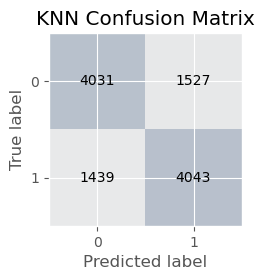

In [83]:


fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.2)

for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i, j],va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('KNN Confusion Matrix');



In [84]:
scorer = make_scorer(matthews_corrcoef)
rf = KNeighborsClassifier()

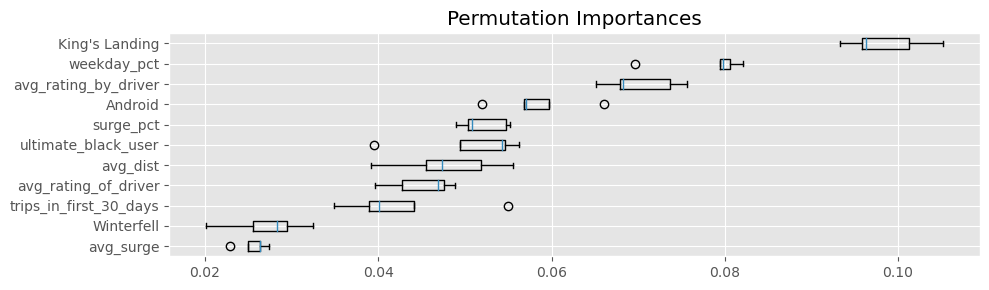

In [89]:
# Compute feature importance using permutation importance
result = permutation_importance(pipe_lr, X_test, y_test ,scoring= scorer, random_state=42)

# Get feature names
feature_names = list(df_clean.drop('duration_coded', axis=1).columns)

# Sort features by their importance scores
sorted_idx = result.importances_mean.argsort()

# Plot feature importance scores
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
ax.set_title("Permutation Importances")
fig.tight_layout()
plt.show()

# Conclusion 

So based on the feature importance of the model they can experiment with:

* Improving the quality of drivers or making more avalaible through tougher screening 
* Provide free black rides/rewards 
* Increase the distance traveled in the first 30 days 
* Increase the number of trips taken in the first 30 days through discounts, rewards, etc
* Experiment with surge multipliers and trying to increase the number of trips taken in a week